# 03. 노드 기능 알아보기

## 03.1 REPL 사용하기

터미널에 ```node```를 치면 콘솔로 사용 가능하다.

## 03.2 JS 파일 실행

```node [자바스크립트 파일 경로]``` (확장자(.js)는 생략 가능)

In [3]:
function helloWorld() {
    console.log('Hello World');
    helloNode();
}

function helloNode() {
    console.log('Hello Node');
}

helloWorld();

Hello World
Hello Node


undefined

## 03.3 모듈로 만들기

노드는 코드를 모듈로 만들 수 있다는 점에서 자바스크립트와 다르다. 모듈은 import/export가 가능하다. 필요한 모듈을 import/export해서 사용할 수 있다.

### func.js

In [ ]:
const { odd, even } = require('./var');

function checkOddOrEven(num) {
    if (num % 2) {
        return odd;
    }
    return even;
}

module.exports = checkOddOrEven;

### var.js

In [ ]:
const odd = '홀수입니다.';
const even = '짝수입니다.';

module.exports = {
    odd,
    even,
};

require 함수 안에 불러올 모듈의 경로를 적는다. 이때 확장자 js 또는 json은 생략 가능하다.

### index.js

In [ ]:
const { odd, even } = require('./var');
const checkNumber = require('./func');

function checkStringOddOrEven(str) {
    if (str.length % 2) {
        return odd;
    }
    return even;
}

console.log(checkNumber(10));
console.log(checkStringOddOrEven('hello'));

#### 실행 결과

➜  nodejs git:(main) ✗ node "/Users/choeseung-won/nodejs/03_노드기능알아보기/index.js"
짝수입니다.
홀수입니다.

### 모듈 사용

1. require() 함수를 통해 불러올 수 있다. 이때 인자로 경로를 넘겨주기만 하면 된다.
2. 모듈은 불러오는 모듈에 의해 다른 변수명으로 불러올 수 있다.

#### ES2015 모듈
ES2015가 도입되면서 자바스크립트도 자체 모듈 시스템 문법이 생겼다.
```javascript
import { odd, even } from './var';

function checkOddOrEven(num) {
    if (num % 2) {
        return odd;
    }
    return even;
}

export default checkOddOrEven;
```

```require('./var');``` => ```import { odd, even } from './var';```<br/>
```module.exports = checkOddOrEven;``` => ```export default checkOddOrEven;```

## 03.4 노드 내장 객체 알아보기

module 객체와 require 함수는 따로 선언하지 않았지만 노드에서 기본적으로 제공하는 내장 객체이기 때문에 바로 사용 가능하다.

### 03.4.1 global

- window와 같은 전역 객체
- 남발하여 사용하는 것은 좋지 않다. (유지보수에 어려움 발생)

### globalA.js

In [ ]:
module.exports = () => global.message;

### globalB.js

In [ ]:
const A = require('./globalA');

global.message = '안녕하세요';
console.log(A());

#### 실행 결과

안녕하세요

#### 설명

global 객체의 속성으로 message를, value로 '안녕하세요'를 추가한다. global 객체는 어디에서나 사용 가능하기 때문에 globalA에서도 사용할 수 있다. 따라서 위와 같은 결과가 나타난다.

### 03.4.2 console

console 객체에는 디버깅을 위한 다양한 메서드 제공됨

In [4]:
const string = 'abc';
const number = 1;
const boolean = true;
const obj = {
    outside: {
        inside: {
            key: 'value',
        },
    },
};

console.time('전체 시간');
console.log('평범한 로그입니다 쉼표로 구분해 여러 값을 찍을 수 있습니다.');
console.log(string, number, boolean);
console.error('에러 메세지는 console.log에 담아주세요');

console.dir(obj, { colors: false, depth: 2 });
console.dir(obj, { colors: true, depth: 1 });

console.time('시간 측정');
for (let i = 0; i < 100000; i ++) {
    continue;
}
console.timeEnd('시간 측정');

function b() {
    console.trace('에러 위치 추적');
}
function a() {
    b();
}

a();

console.timeEnd('전체 시간');

평범한 로그입니다 쉼표로 구분해 여러 값을 찍을 수 있습니다.
abc 1 true


에러 메세지는 console.log에 담아주세요


{ outside: { inside: { key: 'value' } } }
{ outside: { inside: [Object] } }
시간 측정: 3.377ms


Trace: 에러 위치 추적
    at b (evalmachine.<anonymous>:27:13)
    at a (evalmachine.<anonymous>:30:5)
    at evalmachine.<anonymous>:33:1
    at Script.runInThisContext (node:vm:129:12)
    at Object.runInThisContext (node:vm:313:38)
    at run ([eval]:1020:15)
    at onRunRequest ([eval]:864:18)
    at onMessage ([eval]:828:13)
    at process.emit (node:events:513:28)
    at emit (node:internal/child_process:937:14)


전체 시간: 9.48ms


undefined

### 03.4.3 타이머

```setTimeout(콜백 함수, 밀리초)``` : 주어진 밀리초(1000분의 1초) 이후에 콜백 함수를 실행한다. <br/>
```setInterval(콜백 함수, 밀리초)``` : 주어진 밀리초마다 콜백 함수를 반복 실행한다.<br/>
```setImmediate(콜백 함수)``` : 콜백 함수를 즉시 실행한다.<br/>

```clearTimeout(콜백 함수, 밀리초)``` : setTimeout 취소 <br/>
```clearInterval(콜백 함수, 밀리초)``` : setInterval 취소<br/>
```clearImmediate(콜백 함수)``` : setImmediate 취소<br/>

### 03.4.4 __filename, __dirname

In [6]:
console.log(__filename);
console.log(__dirname);

[eval]
.


undefined

### 03.4.5 module, exports

In [ ]:
const odd = '홀수입니다.';
const even = '짝수입니다.';

module.exports = {
    odd,
    even,
};

// 아래로 대체 가능
exports.odd = '홀수입니다';
exports.even = '짝수입니다.';

exports (참조)=> module.exports (참조)=> {} 이와 같은 형태로 참조하고 있다. exports를 사용할 때는 객체만 사용할 수 있다. 따라서 함수는 대입할 수 없다.

### 03.04.6 process

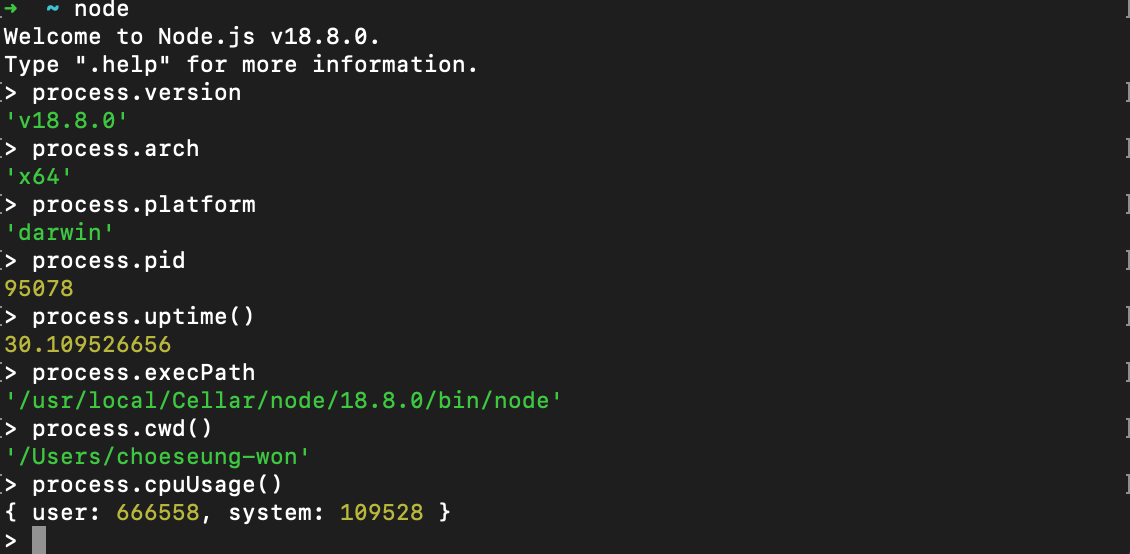

### 03.4.6 process.env

출력되는 변수들은 시스템 환경변수이다. process.env는 서비스의 중요한 키를 저장하는 공간으로도 사용된다.

```javascript
const secretId = process.env.SECRET_ID;
```
위와 같이 process.env에 직접 SECRET_ID를 넣어주면 된다.

#### 9장 dotenv에서 자세히 다룸.

### 03.4.6 process.nextTick(콜백)

- 이벤트 루프가 다른 콜백 함수들보다 nextTick의 콜백 함수를 우선적으로 처리하도록 만든다.
- process.nextTick은 setImmediate나 setTimeout보다 먼저 실행된다.
- Promise.resolve() : resolve된 Promise도 다른 콜백보다 우선순위가 높다.

#### 마이크로태스크
process.nextTick과 Promise를 의미한다.

In [8]:
setImmediate(() => {
    console.log('immediate');
});
process.nextTick(() => {
    console.log('nextTick');
});
setTimeout(() => {
    console.log('timeout');
}, 0);
Promise.resolve().then(() => console.log('promise'));

Promise { <pending> }

nextTick
promise
immediate
timeout


### process.exit(코드)

실행 중인 노드 프로세스를 종료한다.

## 03.5 노드 내장 모듈 사용하기

### 03.5.1 os

자바스크립트는 운영체제 정보를 가져올 수 없지만 노드는 os모듈에 정보가 담겨 있어 정보를 가져올 수 있다.

In [9]:
const os = require('os');

console.log('------------운영체제 정보----------');
console.log(os.arch());
console.log(os.platform());
console.log(os.type());
console.log(os.uptime());
console.log(os.hostname());
console.log(os.release());

console.log('------------경로----------');
console.log(os.homedir());
console.log(os.tmpdir());

console.log('------------cpu 정보----------');
console.log(os.cpus());
console.log(os.cpus().length); // 코어의 개수

console.log('------------메모리 정보----------');
console.log(os.freemem());
console.log(os.totalmem());

------------운영체제 정보----------
x64
darwin
Darwin
1831696
choeseung-won-ui-MacBookAir.local
21.4.0
------------경로----------
/Users/choeseung-won
/var/folders/jt/r_6_crx97j7f9qpf__zcl6qh0000gn/T
------------cpu 정보----------
[
  {
    model: 'Intel(R) Core(TM) i5-8210Y CPU @ 1.60GHz',
    speed: 1600,
    times: { user: 72542270, nice: 0, sys: 42254740, idle: 334979750, irq: 0 }
  },
  {
    model: 'Intel(R) Core(TM) i5-8210Y CPU @ 1.60GHz',
    speed: 1600,
    times: { user: 16161050, nice: 0, sys: 12286480, idle: 421282080, irq: 0 }
  },
  {
    model: 'Intel(R) Core(TM) i5-8210Y CPU @ 1.60GHz',
    speed: 1600,
    times: { user: 70270510, nice: 0, sys: 33822120, idle: 345639180, irq: 0 }
  },
  {
    model: 'Intel(R) Core(TM) i5-8210Y CPU @ 1.60GHz',
    speed: 1600,
    times: { user: 14862460, nice: 0, sys: 11533600, idle: 423333460, irq: 0 }
  }
]
4
------------메모리 정보----------
142295040
8589934592


undefined

### 03.5.2 path
path객체를 사용하여 경로와 관련된 작업을 할 수 있다. (교재 p.95 ~ p.98) 필요할 때 참고

### 03.5.3 url
